# SPRINT3 　ロジスティック回帰

### ロジスティック回帰とは

$$ h_θ(x) = g(θ^T x).\\
g(z) = \frac{1}{1+e^{−z}}.$$

目的変数が２値で表される分類問題を扱う手法（多値分類問題に拡張可能）  
説明変数は量的変数、目的変数は質的変数  
説明変数と回帰係数を掛け合わせた項の線形和をシグモイド関数に通して確率値を出力する  
（例：花の萼と弁のサイズ（説明変数）から花の種類（目的変数）を予測する場合、２種類の花に対して片方を１、  
　　　もう片方を０で表し、ロジスティック回帰の出力を１の花である確率として学習および予測を行う）

### 交差エントロピー誤差関数とは

$$ J(\theta)=  \frac{1}{m}  \sum_{i=1}^{m}[−y^{(i)} log(h_θ(x^{(i)})) − (1−y^{(i)}) log(1−h_θ(x^{(i)}))] . $$

各予測結果(h)の対数をとったものの平均値を算出する関数でありロジスティック回帰においてコスト関数として使われる  
正解(y)と予測(h)の乖離が大きいと値が非常に大きくなる（例：正解が１、予測が０の場合、-1*log(0) = ∞ となり J = ∞となってしまう）

### シグモイド関数を使う理由

入力にどのような値を用いても出力が必ず０から１の範囲となり、出力結果を確率として扱うことが可能になるから

### 正則化の説明

正則化とはモデルが過学習となることを防ぐために、モデルの出力に関わる変数の値が大きくならないようにするルールを設けること。  
（変数の値が大きい状態で学習を終えた場合、入力の値が少し変化するだけで出力が大きく変わってしまうので学習したデータ以外には  
　うまく対応できないということになる。）

### コスト関数に二乗誤差関数ではなく交差エントロピー（誤差）関数を使う理由

ロジスティック回帰における正解とモデルの出力との差は0から１の範囲である。  
その範囲で二乗誤差関数と交差エントロピー関数の傾きを比較すると、後者の方が急である。  
そのため、学習初期のころに、正解とモデルの出力との差が大きい場合、最適解への収束は交差エントロピー関数を使う方が早くなるのでこの関数を使う。

## スクラッチでロジスティック回帰モデルを作成しIris Data set を対象にした分類を行う

データ取得元：　Iris Species（Kaggle）

### データ取得

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
train_df = pd.read_csv("iris/Iris.csv")

### EDA

In [5]:
train_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
train_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


### 特徴量（説明変数）の値をXに入れる

In [8]:
X = train_df[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]

In [9]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [10]:
X["X0"]=1
X

/Users/h_t_mac_book_pro/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,X0
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
5,5.4,3.9,1.7,0.4,1
6,4.6,3.4,1.4,0.3,1
7,5.0,3.4,1.5,0.2,1
8,4.4,2.9,1.4,0.2,1
9,4.9,3.1,1.5,0.1,1


### 目的変数の値をyに入れる

In [11]:
y = train_df[["Species"]]

In [12]:
y=pd.get_dummies(y["Species"])

In [13]:
y

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,1,0,0


In [17]:
y = y.astype('int8')

###  シグモイド関数 

$$g(z) = \frac{1}{1+e^{−z}}.$$

In [14]:
def sigmoid(z):
    return (1/(1+np.exp(-z)))

### コスト関数（交差エントロピー関数）

$$ h_θ(x) = g(θ^T x).\\
g(z) = \frac{1}{1+e^{−z}}.\\
J(\theta)=  \frac{1}{m}  \sum_{i=1}^{m}[−y^{(i)} log(h_θ(x^{(i)})) − (1−y^{(i)}) log(1−h_θ(x^{(i)}))] +
\frac{λ}{2m}\sum_{j=1}^n
θ^2_j. $$

In [74]:
def compute_cost(X, y, theta):
    theta_x = np.dot(X,theta)
    h = sigmoid(theta_x)
    m = len(X)
    J = (1/m) * ( np.dot(-y.T , np.log(h)) - np.dot((1 - y).T , np.log(1-h)) ) \
        + (lambda1/(2*m)) * ((theta*theta)*pd.DataFrame([1,1,1,1,0])).sum().values
    return J[0,0]

### パラメータθの初期値をランダムに設定（説明変数４個＋θ０用１個）

In [82]:
theta = np.random.rand(5,1)

In [21]:
lambda1=0.01

### 最急降下法 

In [24]:
 def gradient_descent(X, y, theta, iterations, alpha):
    """
    args:
      alpha: Step size/Learning rate
      iterations: No. of iterations(Number of iterations)
    """
    m = len(X)
    past_costs =[]
    for i in range(iterations):
        past_costs.append(compute_cost(X, y, theta))
        h_x_y = sigmoid(np.dot(X , theta)) - y
        np_dot = np.dot(X.T , h_x_y)
        #theta0 = theta[4,0] - (alpha/m) * np_dot[4,0]
        theta = theta -  (alpha/m) * (np_dot + lambda1*theta*pd.DataFrame([1,1,1,1,0]))
        #theta[4,0] = theta0
        
    return past_costs ,theta

In [26]:
def cost_plot(costs):
        plt.figure(figsize=(12,8))
        plt.title("Cost Function J")
        # Plot lines
        plt.xlabel('No. of iterations')
        plt.ylabel('Cost')
        plt.legend()
        plt.plot(costs)

### 訓練データ作成

In [27]:
y2 = y.drop("Iris-setosa",axis=1).copy()
y2

,Iris-versicolor,Iris-virginica
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [28]:
y2 = y2.iloc[50:,:]
y2

,Iris-versicolor,Iris-virginica
50,1,0
51,1,0
52,1,0
53,1,0
54,1,0
55,1,0
56,1,0
57,1,0
58,1,0
59,1,0


In [29]:
y2 = y2.reset_index(drop=True)
y2

,Iris-versicolor,Iris-virginica
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,1,0


In [30]:
y2 = y2.drop("Iris-virginica",axis=1)
y2

,Iris-versicolor
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [31]:
X2 = X.iloc[50:,:]
X2

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,X0
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
55,5.7,2.8,4.5,1.3,1
56,6.3,3.3,4.7,1.6,1
57,4.9,2.4,3.3,1.0,1
58,6.6,2.9,4.6,1.3,1
59,5.2,2.7,3.9,1.4,1


In [32]:
X2 = X2.reset_index(drop=True)
X2

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,X0
0,7.0,3.2,4.7,1.4,1
1,6.4,3.2,4.5,1.5,1
2,6.9,3.1,4.9,1.5,1
3,5.5,2.3,4.0,1.3,1
4,6.5,2.8,4.6,1.5,1
5,5.7,2.8,4.5,1.3,1
6,6.3,3.3,4.7,1.6,1
7,4.9,2.4,3.3,1.0,1
8,6.6,2.9,4.6,1.3,1
9,5.2,2.7,3.9,1.4,1


### 回帰実施

In [93]:
iterations=3000
alpha = 0.025

In [83]:
cost,theta = gradient_descent(X2, y2, theta, iterations, alpha)

### 学習曲線プロット

/Users/h_t_mac_book_pro/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


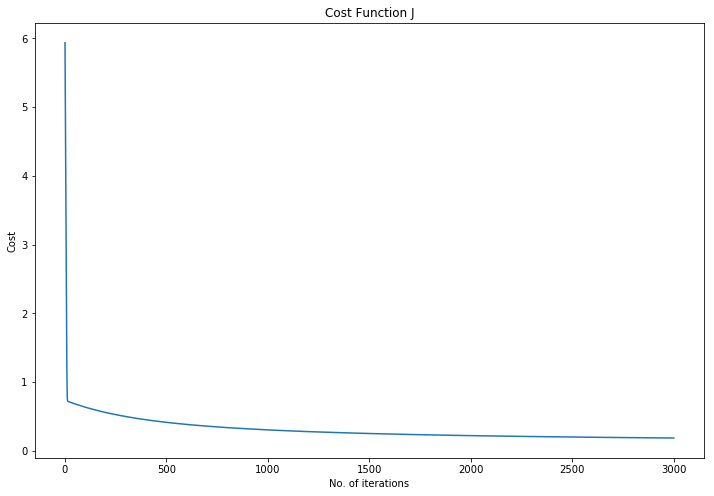

In [84]:
cost_plot(cost)

### 予測関数

In [85]:
# 確率を求める場合
def predict_probs(X, theta):
    theta_x = np.dot(X,theta)
    return sigmoid(theta_x)
    
    
# 分類を行う場合
def predict(X, theta, threshold=0.5):
    theta_x = np.dot(X,theta)
    pred=(sigmoid(theta_x)>=threshold)
    return pred
    

In [86]:
predict_probs(X2, theta)

array([[ 0.96814558],
       [ 0.9260855 ],
       [ 0.89454005],
       [ 0.77114146],
       [ 0.84740374],
       [ 0.72705987],
       [ 0.83297967],
       [ 0.96002796],
       [ 0.93504461],
       [ 0.7922411 ],
       [ 0.88694559],
       [ 0.88897845],
       [ 0.94811568],
       [ 0.74399039],
       [ 0.97592876],
       [ 0.97200453],
       [ 0.63641564],
       [ 0.95625469],
       [ 0.58648401],
       [ 0.93401121],
       [ 0.43641059],
       [ 0.96484812],
       [ 0.46578397],
       [ 0.81193259],
       [ 0.96004326],
       [ 0.95961763],
       [ 0.88033412],
       [ 0.66343296],
       [ 0.76654159],
       [ 0.98940389],
       [ 0.92930219],
       [ 0.95960746],
       [ 0.95777854],
       [ 0.21687037],
       [ 0.53905833],
       [ 0.85691222],
       [ 0.91254189],
       [ 0.83301574],
       [ 0.91324721],
       [ 0.82775962],
       [ 0.69280459],
       [ 0.82484686],
       [ 0.93332753],
       [ 0.96094305],
       [ 0.81997174],
       [ 0

In [87]:
predict(X2, theta, threshold=0.5)

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [88]:
100*np.sum(predict(X2, theta, threshold=0.5)[ :50,0] ==True)/50 

94.0

## クラス化

In [118]:
class LogisticModel():

    def __init__(self,theta):
        self.theta = theta

    def compute_cost(self,X, y, theta):
        theta_x = np.dot(X,theta)
        h = sigmoid(theta_x)
        m = len(X)
        J = (1/m) * ( np.dot(-y.T , np.log(h)) - np.dot((1 - y).T , np.log(1-h)) ) \
            + (lambda1/(2*m)) * ((theta*theta)*pd.DataFrame([1,1,1,1,0])).sum().values
        return J[0,0]

    def gradient_descent(X, y, theta=self.theta, iterations, alpha):
        m = len(X)
        past_costs =[]
        for i in range(iterations):
            past_costs.append(compute_cost(X, y, theta))
            h_x_y = sigmoid(np.dot(X , theta)) - y
            theta = theta -  (alpha/m) * (np.dot(X.T , h_x_y) \
                    + lambda1*theta*pd.DataFrame([1,1,1,1,0]))  
        
        return past_costs ,theta

    def plot_learning_curve(costs):
        plt.figure(figsize=(12,8))
        plt.title("Cost Function J")
        # Plot lines
        plt.xlabel('No. of iterations')
        plt.ylabel('Cost')
        plt.legend()
        plt.plot(costs) 

/Users/h_t_mac_book_pro/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


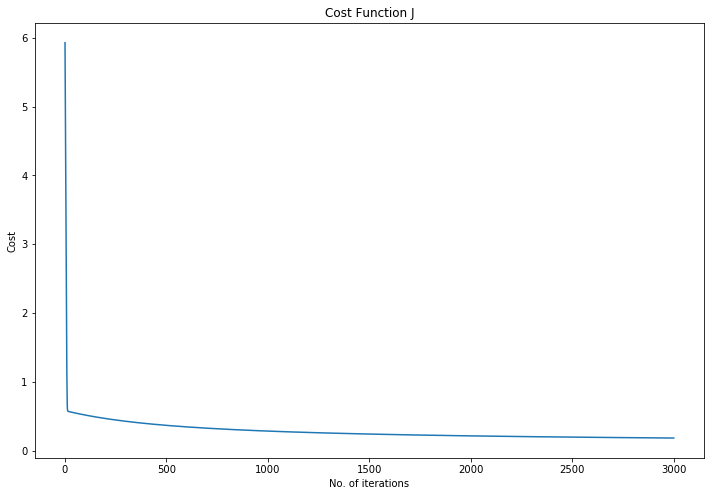

In [114]:
theta = np.random.rand(5,1)
cost,theta = LogisticModel.gradient_descent(X2, y2, theta, iterations, alpha)
LogisticModel.plot_learning_curve(cost)